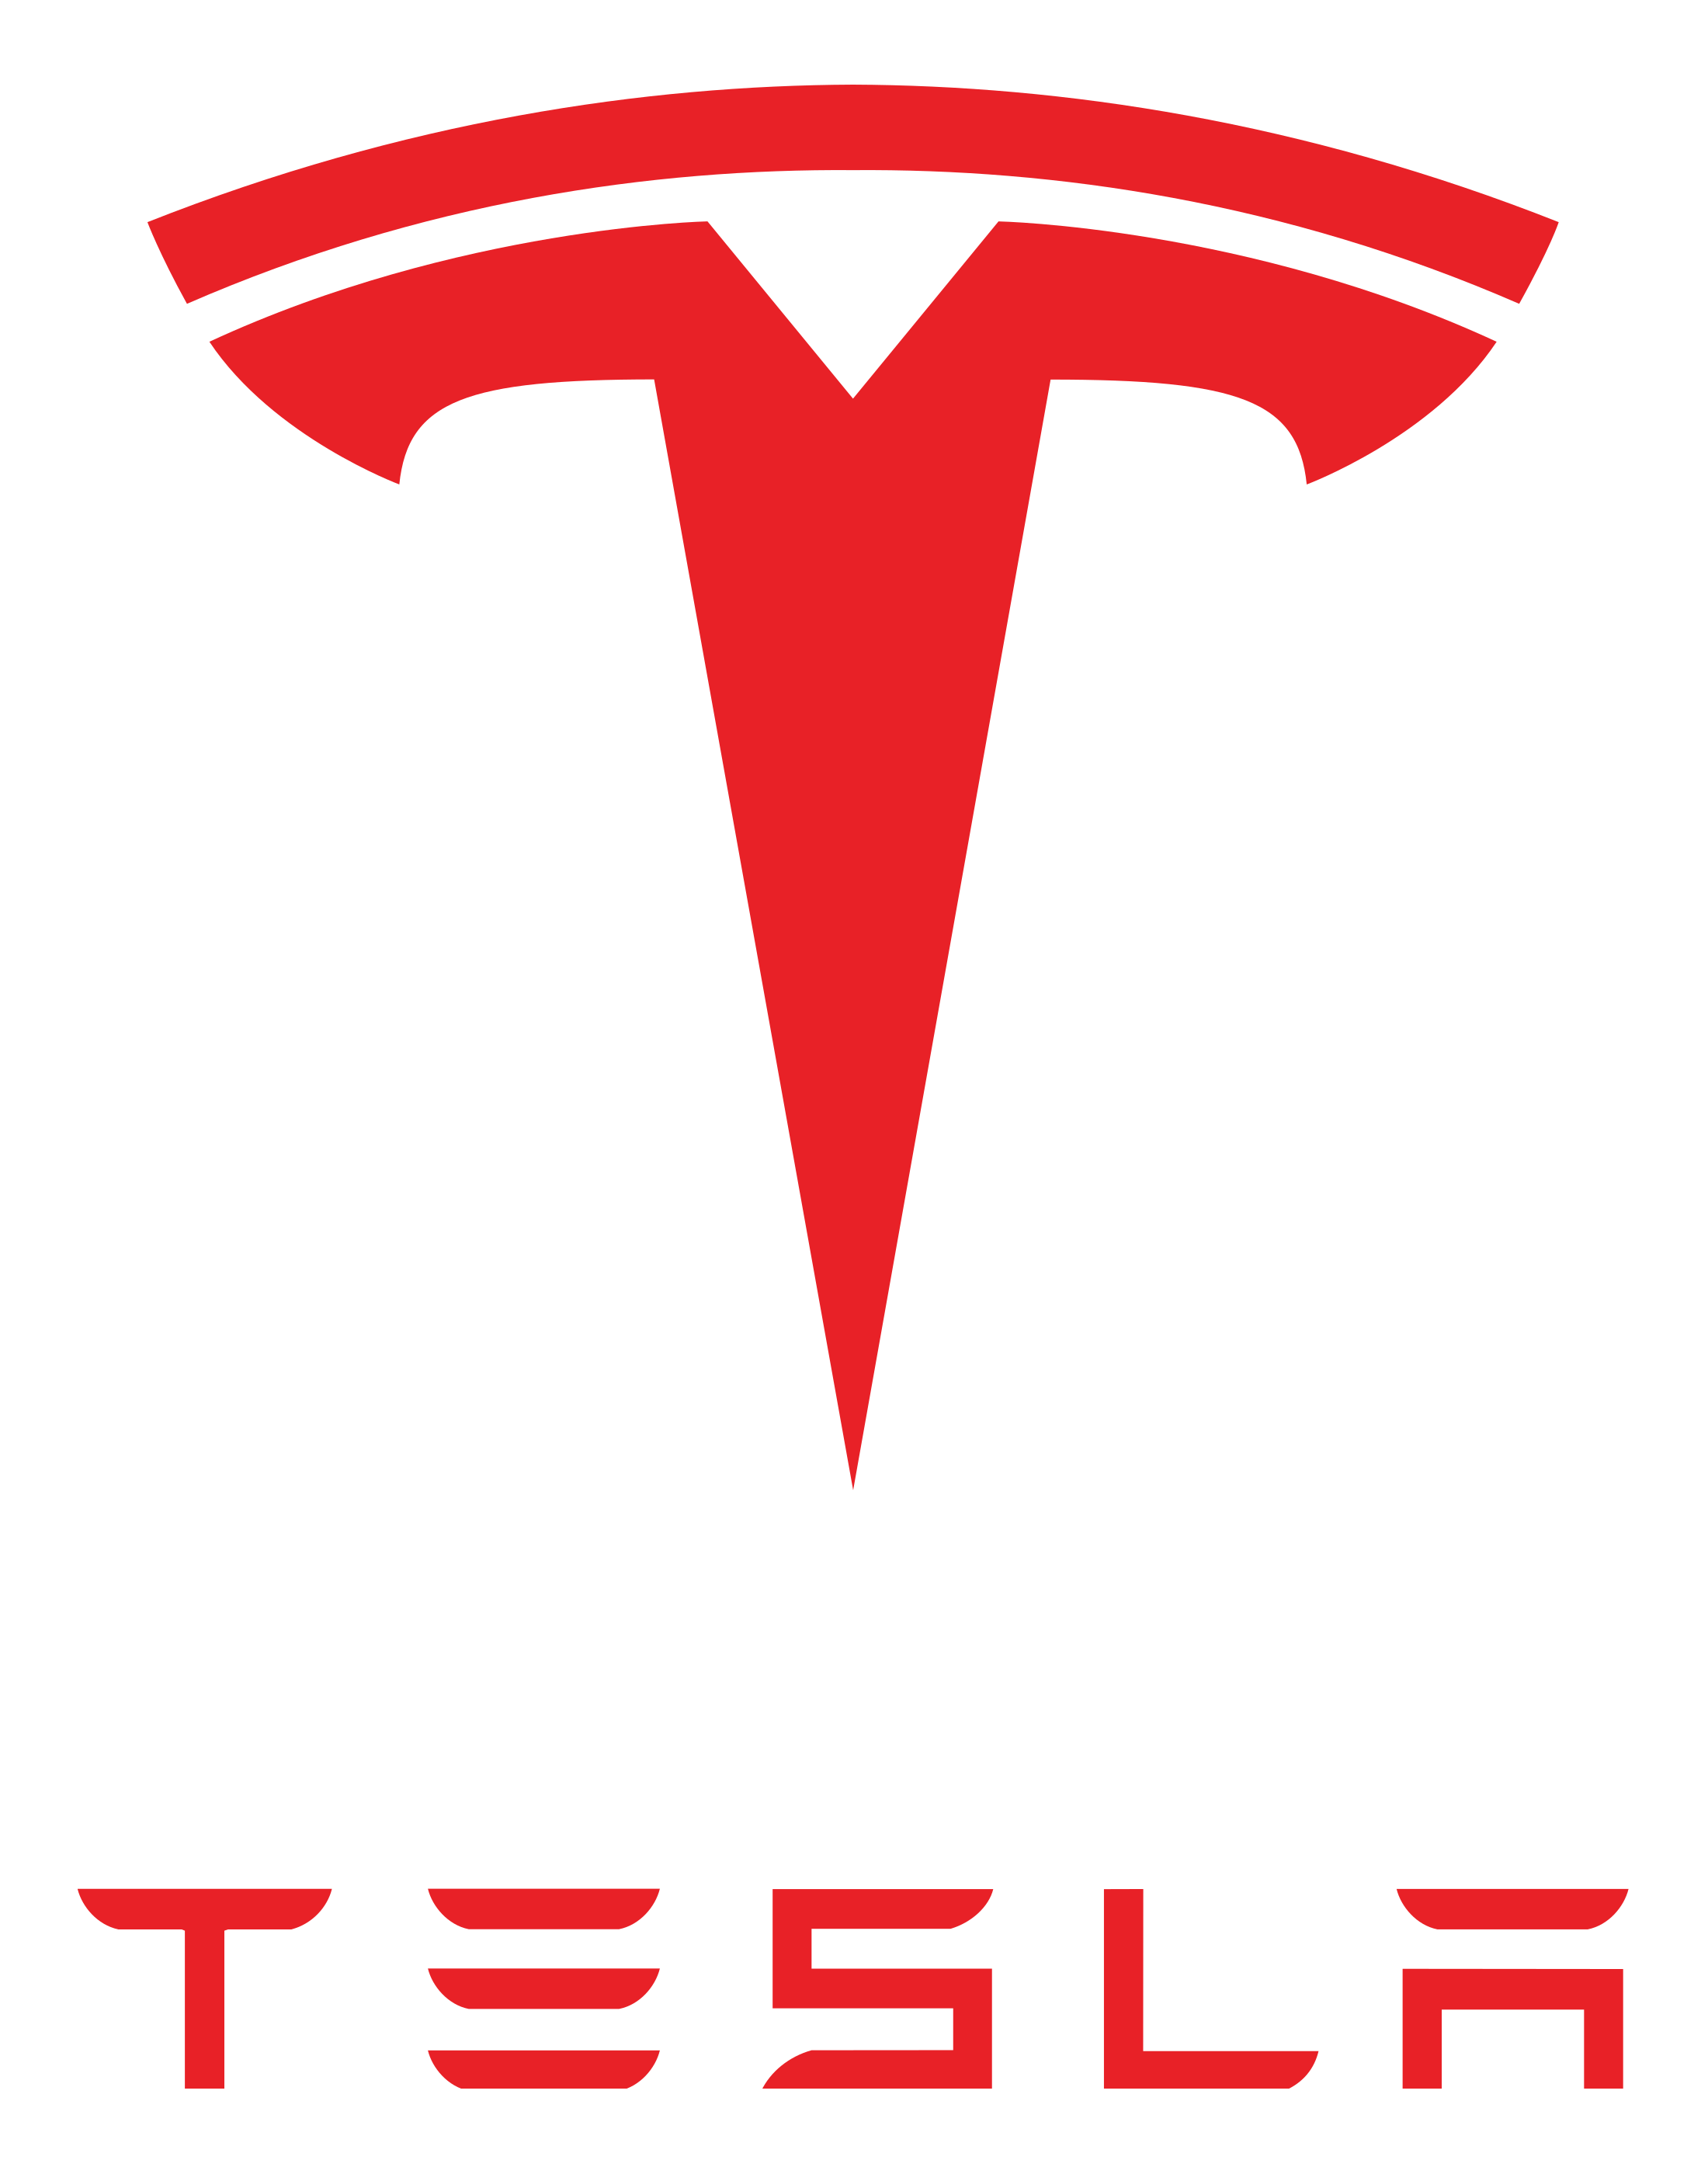

In [14]:
from IPython.display import Image
import os
Image("https://www.carlogos.org/car-logos/tesla-logo-2200x2800.png", width=300, height=500)

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [16]:
tesla = pd.read_csv('tesla_stocks.csv', index_col ="Date", parse_dates = True)

In [17]:
tesla.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800


In [18]:
tesla.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


In [19]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Since close and Adj Close columns are the same we can drop one of the colums

In [20]:
tesla.drop(['Adj Close'], inplace = True, axis = 1)

Plotting a timeline plot for Opening prices of the stocks

/Users/madhavikadam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


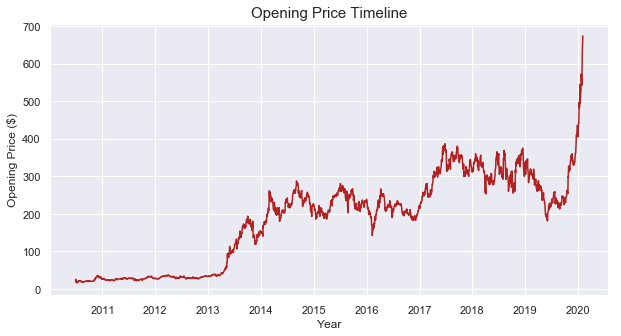

In [21]:
sns.set()
plt.figure(figsize=(10,5))
plt.title('Opening Price Timeline', size=15)
plt.plot(tesla['Open'], color='firebrick')
plt.xlabel('Year', size=12)
plt.ylabel('Opening Price ($)', size=12)
plt.show()

Plotting a timeline plot for Closing prices of the stocks

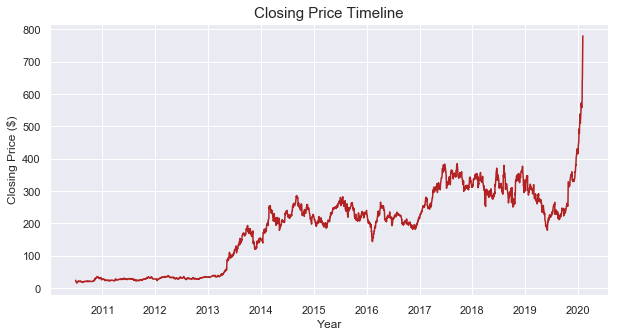

In [22]:
sns.set()
plt.figure(figsize=(10,5))
plt.title('Closing Price Timeline', size=15)
plt.plot(tesla['Close'], color='firebrick')
plt.xlabel('Year', size=12)
plt.ylabel('Closing Price ($)', size=12)
plt.show()

Plotting a timeline plot for Volume of shares/stocks traded

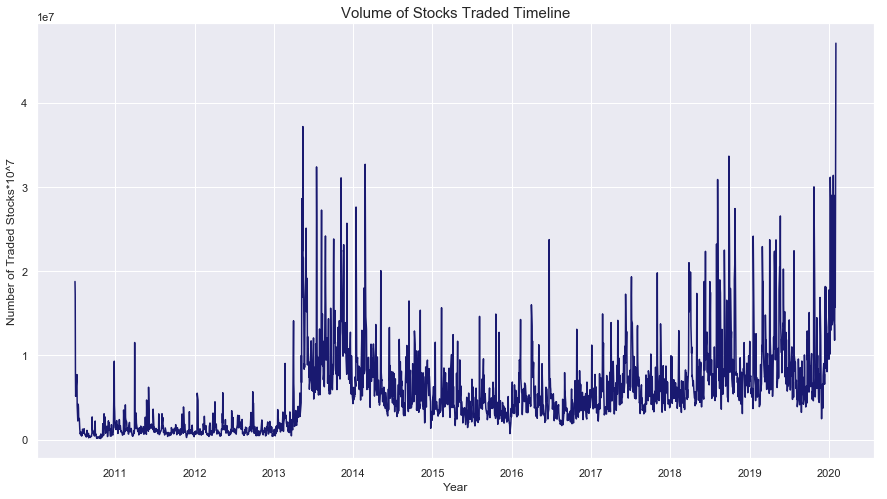

In [23]:
sns.set()
plt.figure(figsize=(15,8))
plt.title('Volume of Stocks Traded Timeline', size=15)
plt.plot(tesla['Volume'], color='midnightblue')
plt.xlabel('Year', size=12)
plt.ylabel('Number of Traded Stocks*10^7', size=12)
plt.show()

We can see that there was a huge spike in the stock trade in April 2013 and then in early 2020 <br/>
More details: https://www.quora.com/Why-did-Teslas-stock-rise-sharply-in-April-2013 <br/>
More details: https://www.cnbc.com/2020/01/31/tesla-tsla-shares-best-month-since-2013-and-third-best-ever.html

Training the model using Linear Regression for the Closing price of the stocks

In [24]:
x = tesla.loc[:,'Open':'Low']
y = tesla.loc[:,'Close']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [26]:
LR = LinearRegression()

In [27]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
accuracy = LR.score(x_test,y_test)*100

In [29]:
print('Accuracy of the model is:',accuracy,'%')

Accuracy of the model is: 99.96937462079073 %


In [30]:
y_pred = LR.predict(x_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [32]:
df.head(5)

,Actual,Predicted
Date,,
2014-05-01,207.729996,211.932562
2012-09-12,28.280001,28.310950
2011-01-28,24.010000,23.935508
2018-02-08,315.230011,326.710119
2016-10-13,200.240005,197.952840


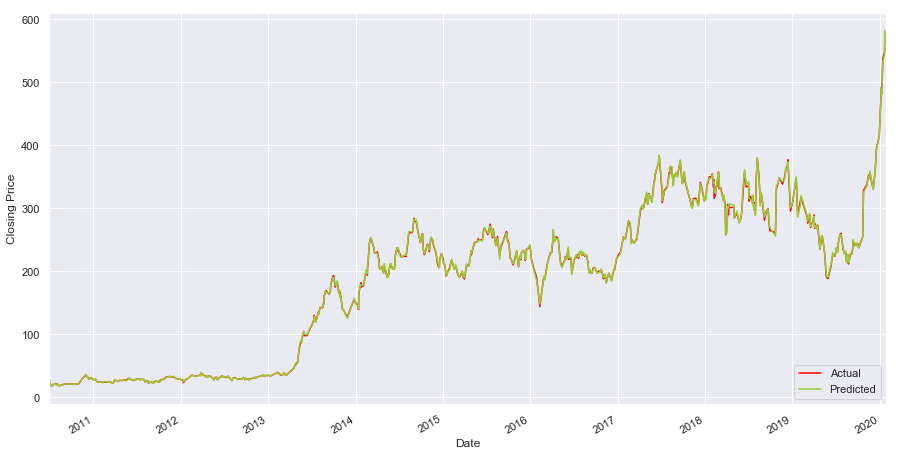

In [37]:
plt.figure(figsize=(15,8))
df['Actual'].plot(color='red')
df['Predicted'].plot(color='yellowgreen')
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()